In [232]:
# DNN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk_model
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

In [326]:
# dataset input and output
url = "https://raw.githubusercontent.com/EngineerRcMak/Stroke-Prediction-Imbalanced-Dataset/main/Stroke%20Prediction.csv"
dataset = pd.read_csv(url, delimiter = ',')
dataset_len = dataset.shape[0]
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [327]:
del dataset["id"]
del dataset["gender"]
del dataset["work_type"]
del dataset["smoking_status"]
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,3.0,0,0,No,Rural,95.12,18.0,0
1,58.0,1,0,Yes,Urban,87.96,39.2,0
2,8.0,0,0,No,Urban,110.89,17.6,0
3,70.0,0,0,Yes,Rural,69.04,35.9,0
4,14.0,0,0,No,Rural,161.28,19.1,0
...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,Urban,58.64,20.4,0
43396,56.0,0,0,Yes,Urban,213.61,55.4,0
43397,82.0,1,0,Yes,Urban,91.94,28.9,0
43398,40.0,0,0,Yes,Urban,99.16,33.2,0


In [330]:
# dataset manipulation\
dataset["ever_married"]= dataset["ever_married"].replace({"No":0,"Yes":1})
dataset["Residence_type"]= dataset["Residence_type"].replace({"Rural":0,"Urban":1})
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,3.0,0,0,0,0,95.12,18.0,0
1,58.0,1,0,1,1,87.96,39.2,0
2,8.0,0,0,0,1,110.89,17.6,0
3,70.0,0,0,1,0,69.04,35.9,0
4,14.0,0,0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...
43395,10.0,0,0,0,1,58.64,20.4,0
43396,56.0,0,0,1,1,213.61,55.4,0
43397,82.0,1,0,1,1,91.94,28.9,0
43398,40.0,0,0,1,1,99.16,33.2,0


In [331]:
dataset.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [332]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   hypertension       43400 non-null  int64  
 2   heart_disease      43400 non-null  int64  
 3   ever_married       43400 non-null  int64  
 4   Residence_type     43400 non-null  int64  
 5   avg_glucose_level  43400 non-null  float64
 6   bmi                41938 non-null  float64
 7   stroke             43400 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.6 MB


In [333]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns,  output_columns

(['age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi'],
 ['stroke'])

In [334]:
# build input matrix
real_input  = dataset[input_columns].copy() 
real_input

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,3.0,0,0,0,0,95.12,18.0
1,58.0,1,0,1,1,87.96,39.2
2,8.0,0,0,0,1,110.89,17.6
3,70.0,0,0,1,0,69.04,35.9
4,14.0,0,0,0,0,161.28,19.1
...,...,...,...,...,...,...,...
43395,10.0,0,0,0,1,58.64,20.4
43396,56.0,0,0,1,1,213.61,55.4
43397,82.0,1,0,1,1,91.94,28.9
43398,40.0,0,0,1,1,99.16,33.2


In [335]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
43395,0
43396,0
43397,0
43398,0


In [336]:
# outlier detection, data normalization for next several sessions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b20eccf50>,
      dtype=object)

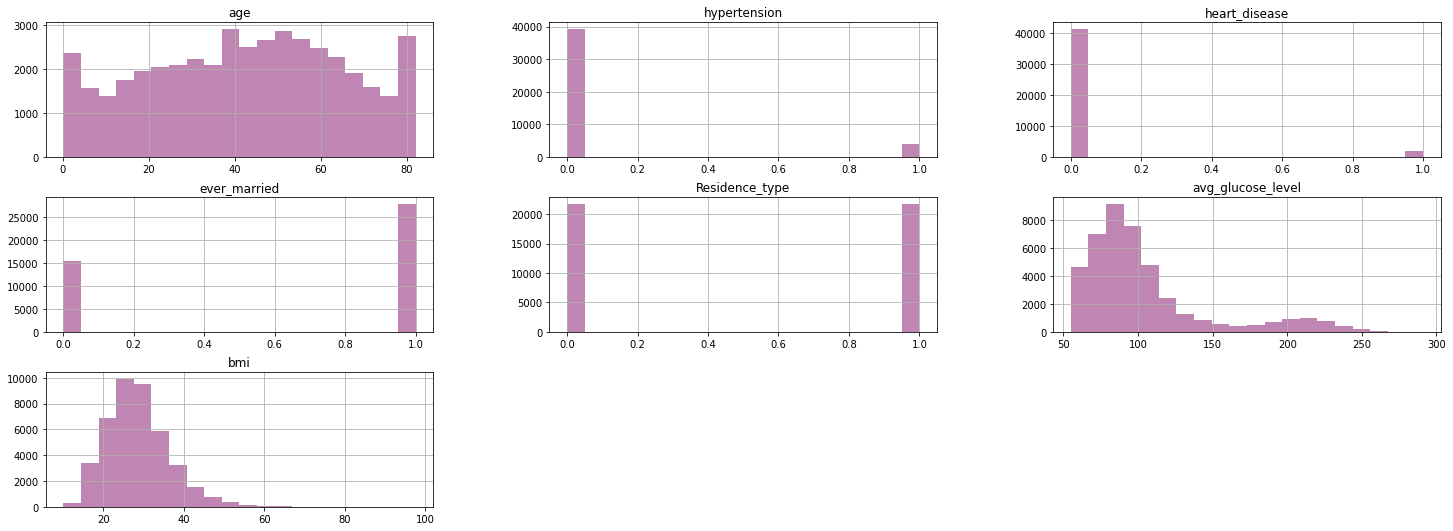

In [337]:
# histogram (data vs frequency)
'''real_input.hist(figsize  = (25, 25), layout = ((real_input.columns.size+1)//2, 2), color='#BF86B4', bins = 20)'''
real_input.hist(figsize = (25, 25), layout=(8,3), color='#BF86B4', bins = 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


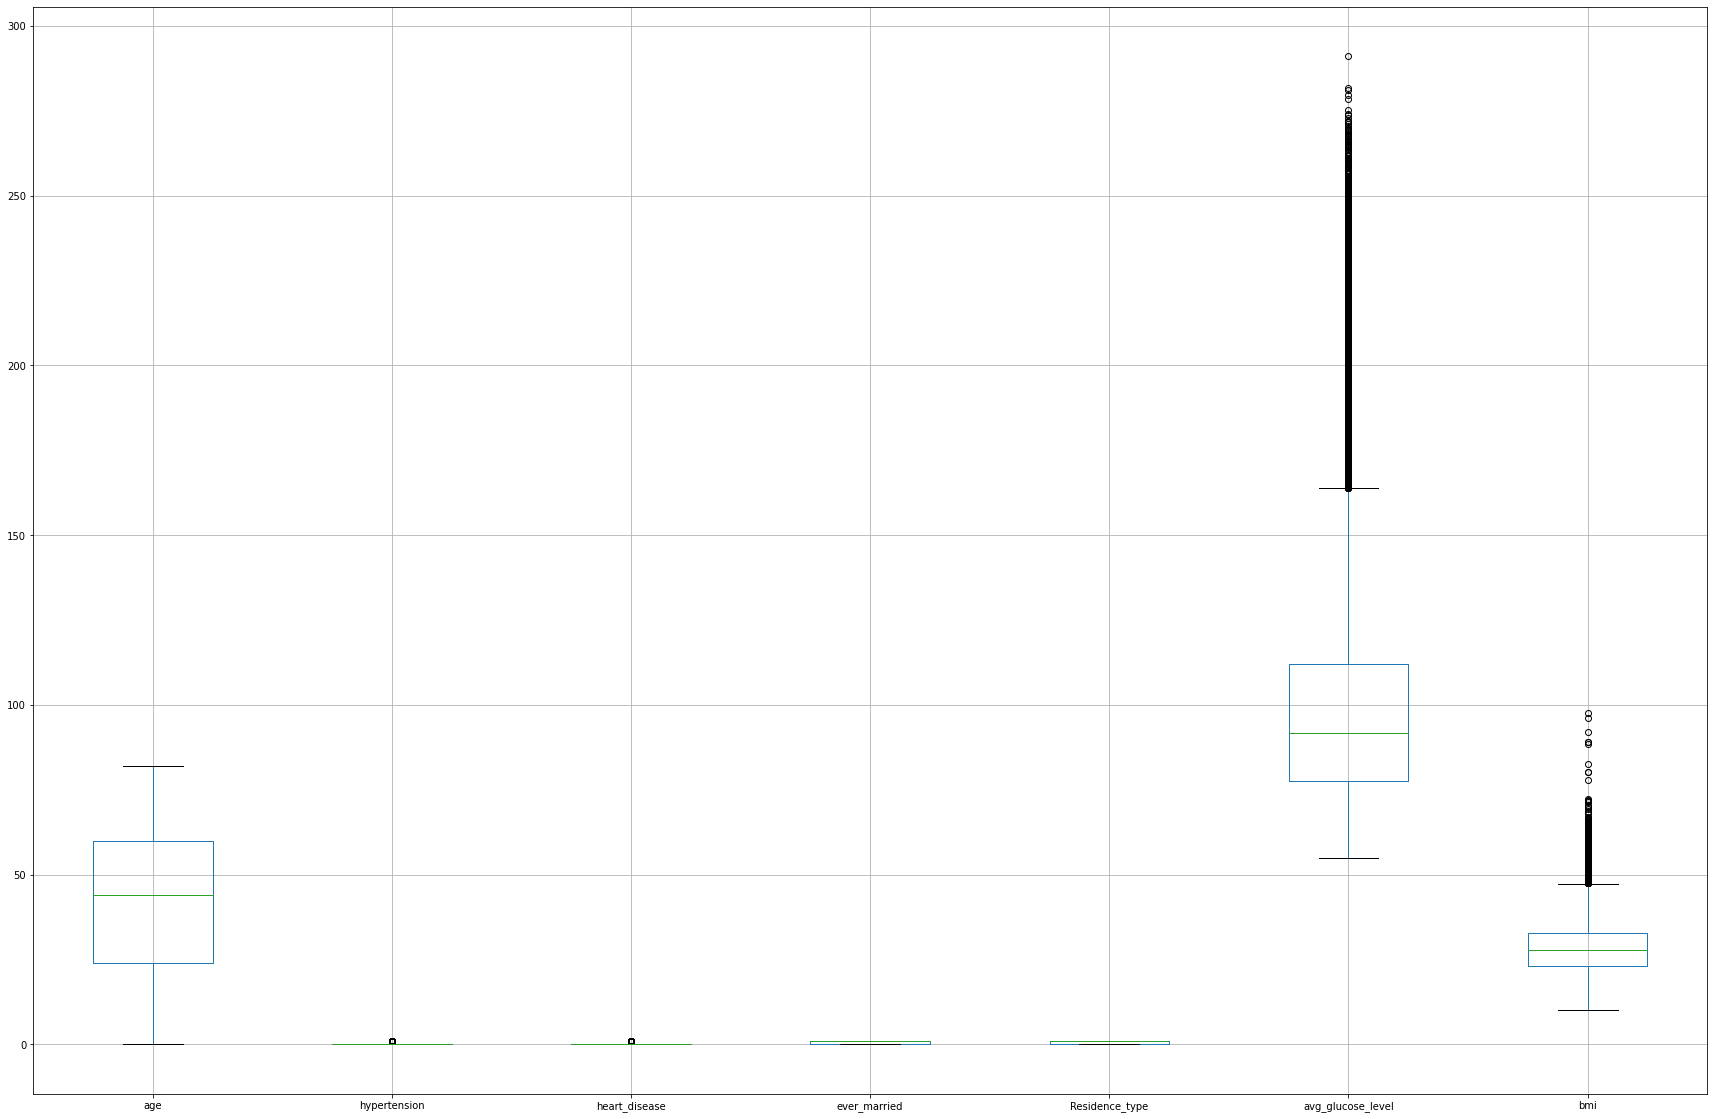

In [338]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (30, 20))

In [339]:
features = real_input.columns.values.tolist()
features

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi']

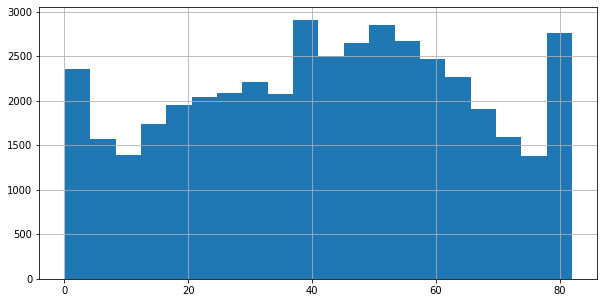

In [340]:
# outlier detection
j = 0
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

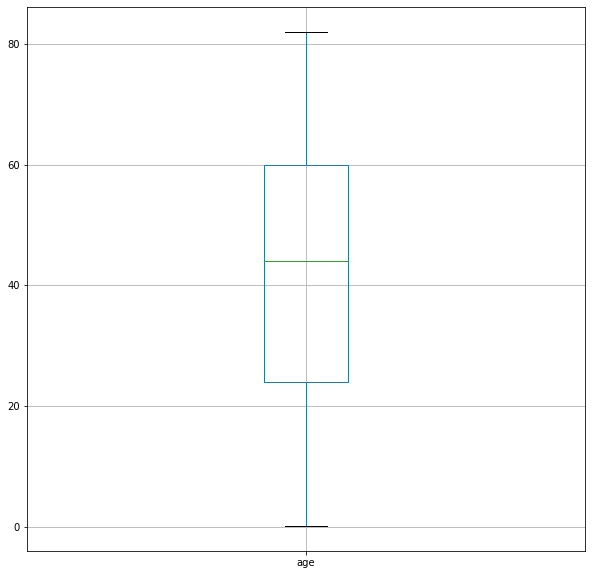

In [341]:
real_input.boxplot(column = feature, figsize = (10, 10))

In [342]:
'''
For feature "age",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 20) &\
                                                         (real_input[feature] <= 70) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 18)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 12) &\
                                                      (real_input[feature] <= 18) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 18].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [343]:
print("feature", feature, "details =")
real_input[feature].describe()

feature age details =


count    43400.000000
mean        29.346553
std          5.736915
min          0.017880
25%         31.046812
50%         31.046812
75%         31.046812
max         31.046812
Name: age, dtype: float64

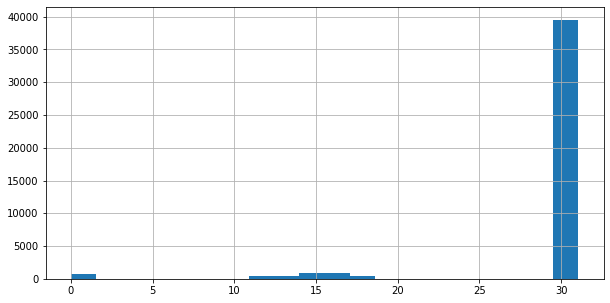

In [344]:
'''
Feature "age" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

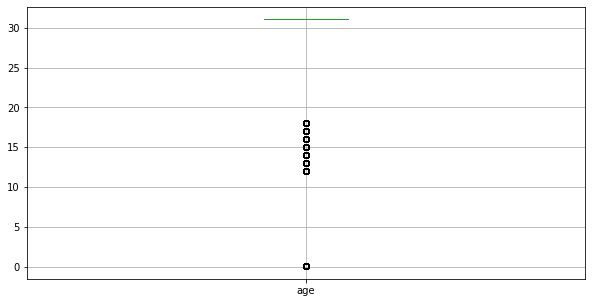

In [345]:
real_input.boxplot(column = feature, figsize = (10, 5))

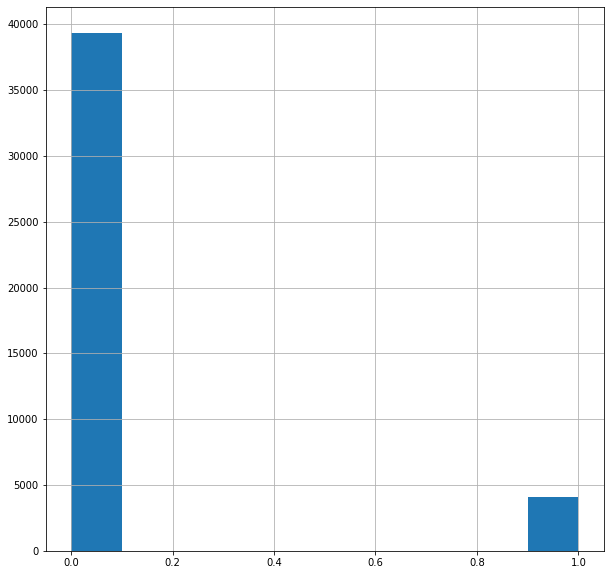

In [346]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 10), bins = 10)

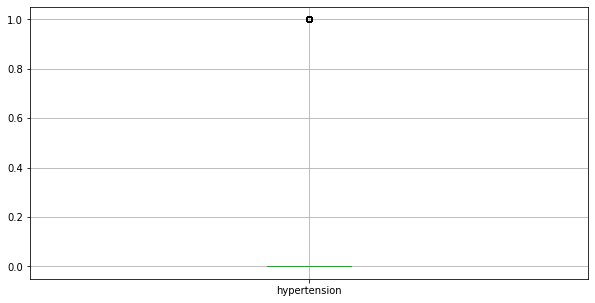

In [347]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [348]:
'''
For feature "hypertension",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 0.2) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 22)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                      (real_input[feature] <= 22) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 22].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [349]:
print("feature", feature, "details =")
real_input[feature].describe()

feature hypertension details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: hypertension, dtype: float64

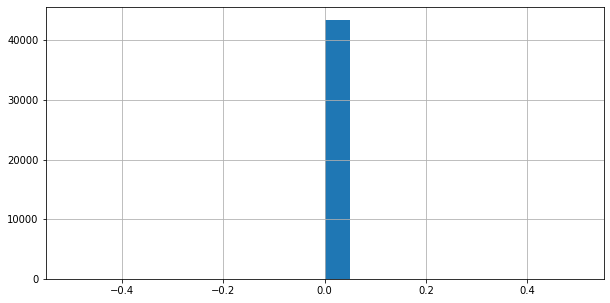

In [350]:
'''
feature "hypertension" is not well distributed. 
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

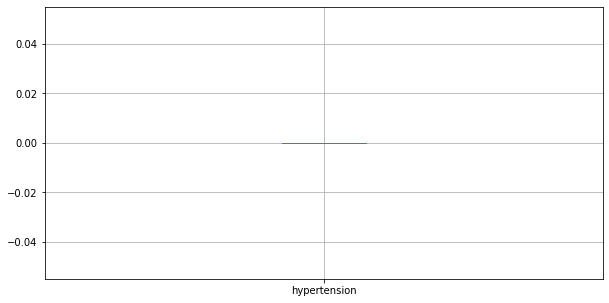

In [351]:
real_input.boxplot(column = feature, figsize = (10, 5))

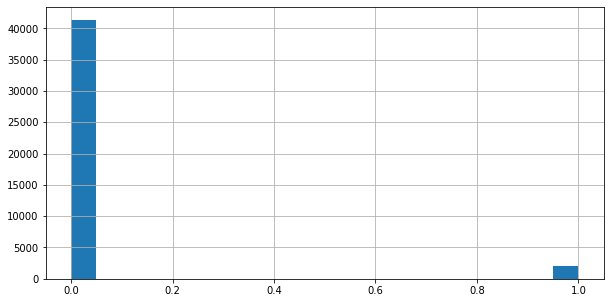

In [352]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

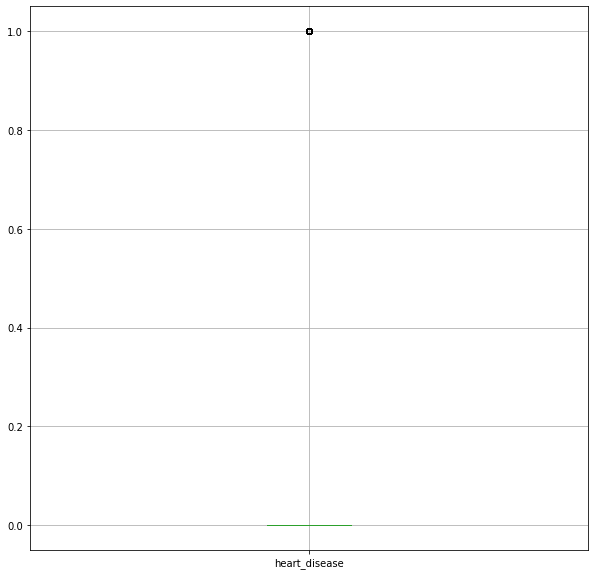

In [353]:
real_input.boxplot(column = feature, figsize = (10, 10))

In [354]:
'''
For feature "heart_disease",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 0.1) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 110)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 70) &\
                                                      (real_input[feature] <= 110) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 110].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [355]:
print("feature", feature, "details =")
real_input[feature].describe()

feature heart_disease details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: heart_disease, dtype: float64

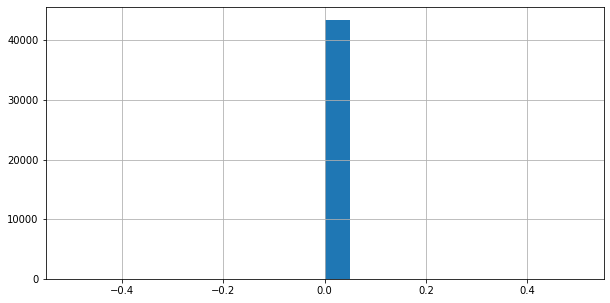

In [356]:
real_input[feature].hist(figsize = (10, 5), bins = 20)

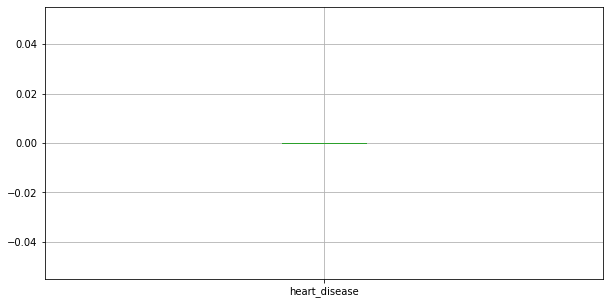

In [357]:
real_input.boxplot(column = feature, figsize = (10, 5))

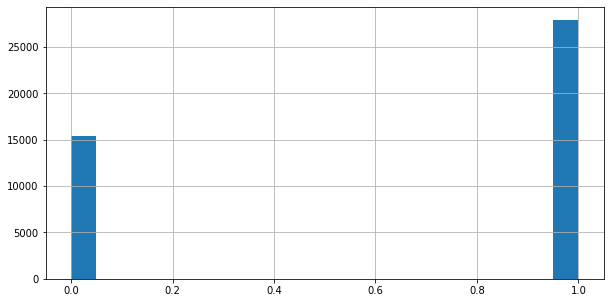

In [358]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

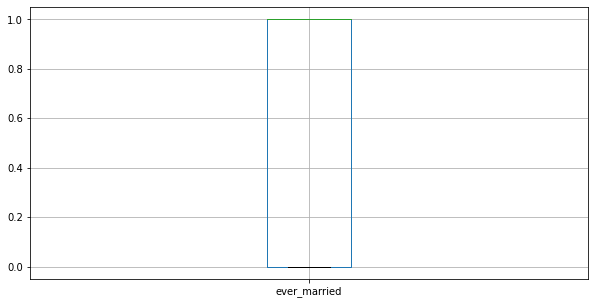

In [359]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [360]:
'''
For feature "ever_married",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 1.5) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 950)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 470) &\
                                                      (real_input[feature] <= 950) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 950].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [361]:
print("feature", feature, "details =")
real_input[feature].describe()

feature ever_married details =


count    43400.000000
mean         0.627535
std          0.085061
min          0.000000
25%          0.639064
50%          0.639064
75%          0.639064
max          0.639064
Name: ever_married, dtype: float64

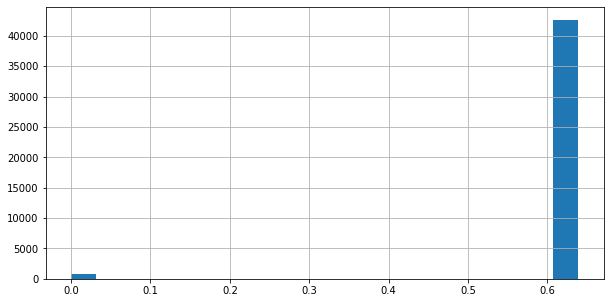

In [362]:
'''
Feature "ever_married" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

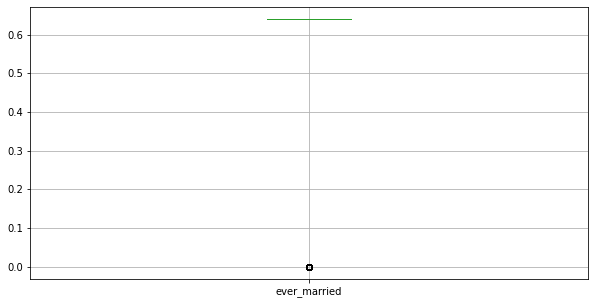

In [363]:
real_input.boxplot(column = feature, figsize = (10, 5))

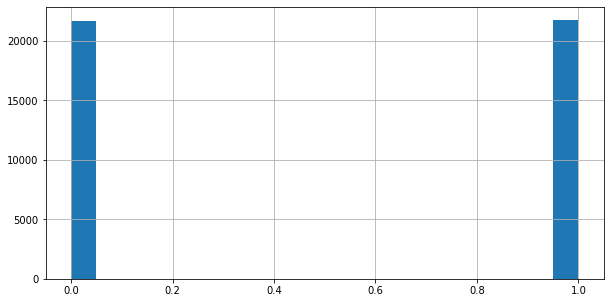

In [364]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

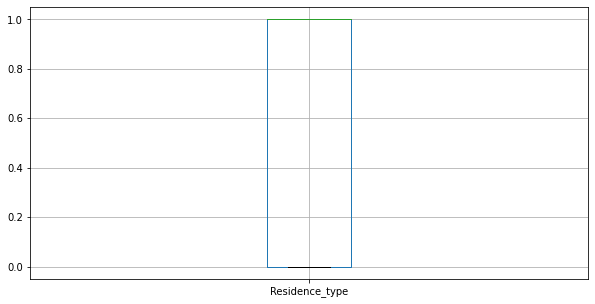

In [365]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [366]:
'''
For feature "Residence_type",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.09, other = 0.09)


# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 1.5) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.105)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.09) &\
                                                      (real_input[feature] <= 0.105) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.105].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [367]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Residence_type details =


count    43400.000000
mean         0.313992
std          0.228449
min          0.044138
25%          0.090000
50%          0.090000
75%          0.546036
max          0.546036
Name: Residence_type, dtype: float64

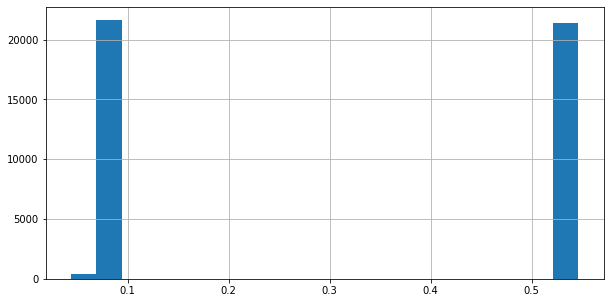

In [369]:
'''
Feature "Residence_type" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

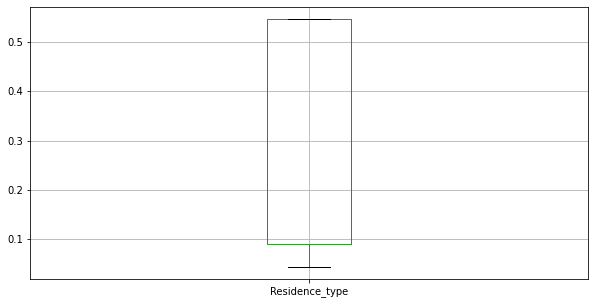

In [370]:
real_input.boxplot(column = feature, figsize = (10, 5))

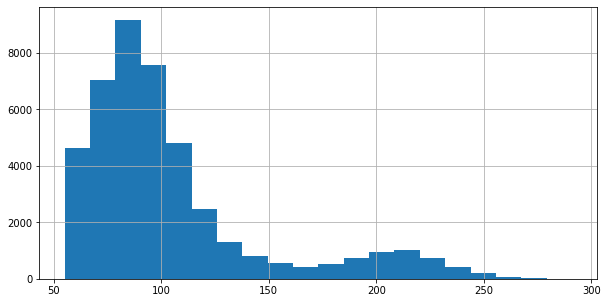

In [371]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

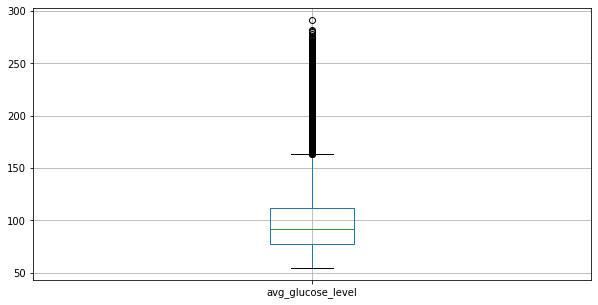

In [372]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [373]:
'''
For feature "avg_glucose_level",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.08, other = 60)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 150)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 20) &\
                                                         (real_input[feature] <= 40) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [374]:
print("feature", feature, "details =")
real_input[feature].describe()

feature avg_glucose_level details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: avg_glucose_level, dtype: float64

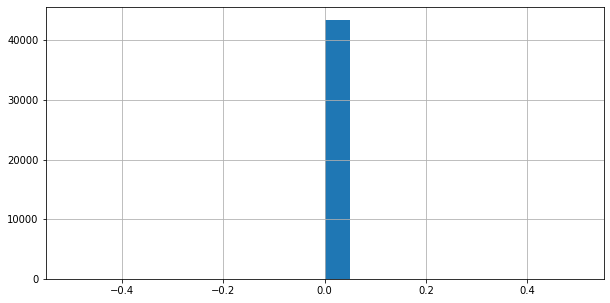

In [375]:
'''
Feature "avg_glucose_level" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

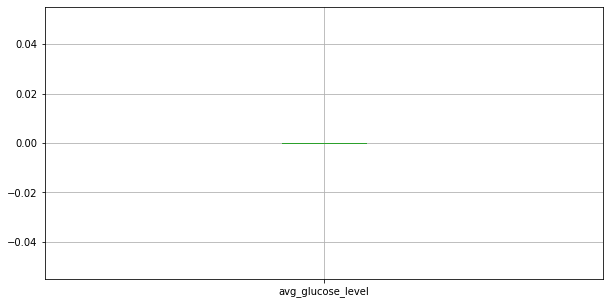

In [376]:
real_input.boxplot(column = feature, figsize = (10, 5))

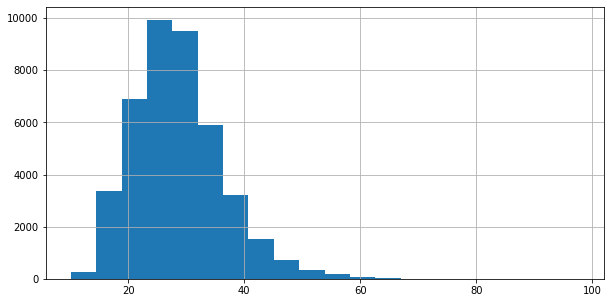

In [377]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

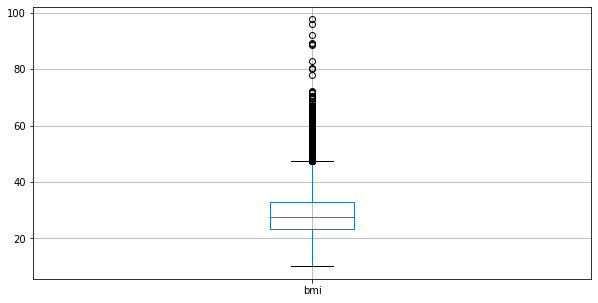

In [378]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [379]:
'''
For feature "bmi",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.08, other = 20)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 40)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 20) &\
                                                         (real_input[feature] <= 40) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [380]:
print("feature", feature, "details =")
real_input[feature].describe()

feature bmi details =


count    41938.000000
mean        38.164919
std          4.762404
min          0.000000
25%         38.759181
50%         38.759181
75%         38.759181
max         38.759181
Name: bmi, dtype: float64

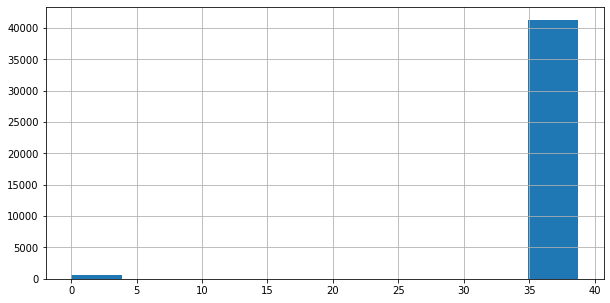

In [381]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

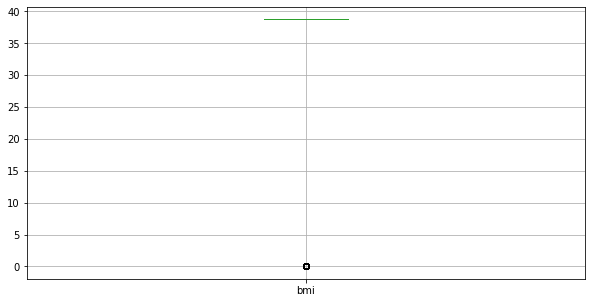

In [382]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [383]:
#data normalization
'''    
There are a number of techniques to normalize data such as-
min-max normalization, feature clipping, log scaling, z-score etc.
more information available at -
https://developers.google.com/machine-learning/data-prep/transform/normalization
'''
# min-max equation -
# X = (X - Xmin) / (Xmax - Xmin)
#real_input = (real_input - real_input.min()) / (real_input.max() - real_input.min())
tmp_input  = sk_preprocessing.MinMaxScaler().fit_transform(real_input)
real_input = pd.DataFrame(data = tmp_input, columns = real_input.columns.values.tolist())

real_input

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1.000000,0.0,0.0,1.0,0.091377,0.0,1.0
1,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0
2,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0
3,1.000000,0.0,0.0,1.0,0.091377,0.0,1.0
4,0.450616,0.0,0.0,1.0,0.091377,0.0,1.0
...,...,...,...,...,...,...,...
43395,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0
43396,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0
43397,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0
43398,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0


In [384]:
real_input.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,43400.000000,43400.0,43400.0,43400.000000,43400.000000,43400.0,41938.000000
mean,0.945204,0.0,0.0,0.981959,0.537668,0.0,0.984668
std,0.184889,0.0,0.0,0.133103,0.455170,0.0,0.122872
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
25%,1.000000,0.0,0.0,1.000000,0.091377,0.0,1.000000
50%,1.000000,0.0,0.0,1.000000,0.091377,0.0,1.000000
75%,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000
max,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000


In [385]:
# data correlation 
real_input.corr()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
age,1.000000,NaN,NaN,0.692539,0.103967,NaN,0.659168
hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,0.692539,NaN,NaN,1.000000,0.146771,NaN,1.000000
Residence_type,0.103967,NaN,NaN,0.146771,1.000000,NaN,0.135428
avg_glucose_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.659168,NaN,NaN,1.000000,0.135428,NaN,1.000000


([<matplotlib.axis.YTick at 0x7f1b2059ec10>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'hypertension'),
  Text(0, 0, 'heart_disease'),
  Text(0, 0, 'ever_married'),
  Text(0, 0, 'Residence_type'),
  Text(0, 0, 'avg_glucose_level'),
  Text(0, 0, 'bmi')])

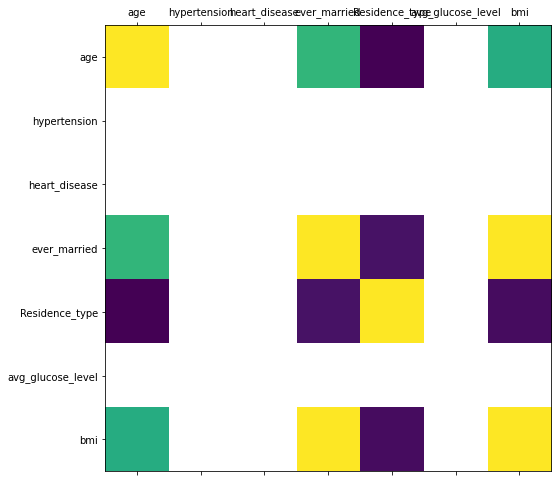

In [386]:
# graphical representation of data correlation
# data correlation means dependency of data among each others i.e.
# dependency of attributes among each other
'''
data correlation formula between two attributes (data columns) X and Y -

            Σ(X - Xmean) * Σ(Y - Ymean) 
corr = -------------------------------------
       sqrt(Σ(X - Xmean)^2 * Σ(Y - Ymean)^2)
       
'''
plt.matshow(real_input.corr())
plt.xticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)
plt.yticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)

In [387]:
# split real_input and real_output into train and test input, output taking
# 70:30 train:test 
train_input, test_input, train_output, test_output = sk_model.train_test_split(real_input,\
                                                                                real_output,\
                                                                                train_size = 0.60)
train_input.shape, test_input.shape, train_output.shape, test_output.shape

((26040, 7), (17360, 7), (26040, 1), (17360, 1))

In [388]:
'''
Tensor-Flow Keras Neural Network model life-cycle.
1. Define the model,
2. Compile the model,
3. Fit the model,
4. Evaluate the model,
5. Predict the model.
'''

'\nTensor-Flow Keras Neural Network model life-cycle.\n1. Define the model,\n2. Compile the model,\n3. Fit the model,\n4. Evaluate the model,\n5. Predict the model.\n'

In [389]:
# Define model1
h1, h2 = 8, 12
o = 1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(h1, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model1.add(tf.keras.layers.Dense(h2, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))
model1.add(tf.keras.layers.Dense(o, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))

In [390]:
# Define model2
h1, h2 = 8, 12
o = 1
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(h1, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model2.add(tf.keras.layers.Dense(h2, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))
model2.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [391]:
# Define model3
h1, h2 = 8, 12
o = 1
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(h1, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model3.add(tf.keras.layers.Dense(h2, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))
model3.add(tf.keras.layers.Dense(o, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))